<a href="https://colab.research.google.com/github/JuanZapa7a/AINavalEngineering/blob/main/Prac02_Vectors%2C_Matrices_and_Multidimensional_Arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Robert Johansson 2019
R. Johansson, [Numerical Python,](https://doi.org/10.1007/978-1-4842-4246-9_3)
https://github.com/Apress/numerical-python/blob/master/ch02-code-listing.ipynb

Source code listings for Numerical Python - A Practical Techniques Approach for Industry (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

# Chapter 2: Vectors, matrices and multidimensional arrays

# Vectors, Matrices, and Multidimensional Arrays

Vectors, matrices, and arrays of higher dimensions are essential tools in
numerical computing. When a computation must be repeated for a set of input
values, it is natural and advantageous to represent the data as arrays and the
computation in terms of array operations. Computations that are formulated this
way are said to be vectorized. 

[Vectorized computing](https://www.cdslab.org/python/notes/scientific-computing/vectorization/vectorization.html) eliminates the need for
many explicit loops over the array elements by applying batch operations on the
array data. The result is concise and more maintainable code, and it enables
delegating the implementation of (e.g., elementwise) array operations to more
efficient low-level libraries. Vectorized computations can therefore be
significantly faster than sequential element-by-element computations. This is
particularly important in an interpreted language such as Python, where looping
over arrays element by element entails a significant performance overhead.  

In Python’s scientific computing environment, efficient data structures for
working with arrays are provided by the `NumPy library`. The core of NumPy is
implemented in C and provides efficient functions for manipulating and
processing arrays. At a first glance, NumPy arrays bear some resemblance to
Python’s list data structure. But an important difference is that while Python
lists are generic containers of objects, `NumPy arrays are homogenous and typed
arrays of fixed size`. 
- `Homogenous` means that all elements in the array have the
same data type.  
- `Fixed size` means that an array cannot be resized (without
creating a new array).  

For these and other reasons, operations and functions
acting on NumPy arrays can be much more efficient than those using Python lists.
In addition to the data structures for arrays, `NumPy also provides`: 
- `a large
collection of basic operators and functions` that act on these data structures,
- `as well as submodules with higher-level algorithms such as linear algebra and
fast Fourier transform`.

In this chapter: 
1. We first look at the `basic NumPy data structure` for arrays and
various `methods to create` such NumPy arrays. 
2. Next we look at `operations` for
`manipulating arrays` and for doing `computations` with arrays. 
3. The multidimensional
data array provided by `NumPy is a foundation` for nearly all numerical libraries
for Python.  
4. Spending time on getting familiar with NumPy and developing an
understanding of `how NumPy works is therefore important`.

> **NumPy**: The NumPy library provides data structures for representing a rich
> variety of arrays and methods and functions for operating on such arrays. NumPy
> provides the numerical backend for nearly every scientific or technical library
> for Python. It is therefore a very important part of the scientific Python
> ecosystem. At the time of writing, the latest version of NumPy is 1.14.2. More
> information about NumPy is available at [www.numpy.org](http://www.numpy.org).

## Importing the Modules

In order to use the NumPy library, we need to import it in our program. By
convention, the numPy module imported under the `alias np`, like so:

In [236]:
%pip install --upgrade pip
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


After this, we can access functions and classes in the numpy module using the `np
namespace`. Throughout this book, we assume that the NumPy module is imported in this way.

## The NumPy array object

The core of the NumPy library is the data structures for representing
multidimensional arrays of homogeneous data. [`Homogeneous`](https://brainly.in/question/11853504) `refers to all elements
in an array having the same data type`.

The main data structure for
multidimensional arrays in NumPy is the `ndarray` class. In addition to the data
stored in the array, this data structure also contains important metadata about
the array, such as its `shape, size, data type, and other attributes`. See Table
2-1 for a more detailed description of these attributes. 

A full list of
attributes with descriptions is available in the `ndarray` docstring, which can be
accessed by calling `help(np.ndarray)` in the Python interpreter or `np.ndarray?` in
an IPython console.

In [353]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any 



_**Table 2-1**_. Basic Attributes of the ndarray Class

Attribute | Description
---|---
Shape | A tuple that contains the number of elements (i.e., the length) for each dimension (axis) of the array.
Size | The total number elements in the array.
Ndim | Number of dimensions (axes).
nbytes | Number of bytes used to store the data.
dtype | The data type of the elements in the array.

The following example demonstrates how these attributes are accessed for an
instance data of the class `ndarray`:

In [354]:
data = np.array([[1, 2], [3, 4], [5, 6]])

In [355]:
type(data)

numpy.ndarray

In [356]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [357]:
data.ndim

2

In [358]:
data.shape

(3, 2)

In [360]:
data.size

6

In [361]:
data.dtype

dtype('int64')

In [362]:
data.nbytes

48

Here the `ndarray` instance data is created from a nested Python list using the
function `np.array`. More ways to create ndarray instances from data and from
rules of various kinds are introduced later in this chapter. 
In the preceding
example, the data is: 
- a two-dimensional array (`data.ndim`) 
- of shape 3 × 2, as
indicated by `data.shape`, 
- and in total it contains six elements (`data.size`)
- of type `int64` (`data.dtype`)(8 bytes), 
- which amounts to a total size of 48
bytes (6 elements x 8 bytes = 64 Bytes) (`data.nbytes`).

## Data types

In the previous section, we encountered the dtype attribute of the `ndarray`
object. This attribute describes the data type of each element in the array
(`remember, since NumPy arrays are homogeneous, all elements have the same data
type`). 

The basic numerical data types supported in NumPy are shown in Table 2-2.
Nonnumerical data types, such as strings, objects, and user-defined compound
types, are also supported.

_**Table 2-2**_. Basic Numerical Data Types Available in NumPy

dtype | Variants | Description
---|---|---
int | int8, int16, int32, int64 | Integers
uint | uint8, uint16, uint32, uint64 | Unsigned (nonnegative) integers
bool | Bool | Boolean (True or False)
float | float16, float32, float64, float128 | Floating-point numbers
complex | complex64, complex128, complex256 | Complex-valued floating-point numbers

For numerical work the most important data types are int (for integers), float
(for floating-point numbers), and `complex` (for complex floating-point numbers).
Each of these data types comes in different sizes, such as `int32` for 32-bit
integers, `int64` for 64-bit integers, etc. This offers more fine-grained control
over data types than the standard Python types, which only provides one type for
integers and one type for floats.

It is usually not necessary to explicitly choose the bit size of the data type
to work with, but it is often necessary to explicitly choose whether to use
arrays of integers, floating- point numbers, or complex values.

The following example demonstrates how to use the `dtype` attribute to generate
arrays of integer-, float-, and complex-valued elements:

In [246]:
np.array([1, 2, 3], dtype=int) # or np.int64 (etc)

array([1, 2, 3])

In [247]:
np.array([1, 2, 3], dtype=float) # or np.float64 (etc)

array([1., 2., 3.])

In [248]:
np.array([1, 2, 3], dtype=complex) # or np.complex64 (etc)

array([1.+0.j, 2.+0.j, 3.+0.j])

Once a NumPy array is created, its `dtype` cannot be changed, other than by
creating a new copy with type-casted array values. Typecasting an array is
straightforward and can be done using either the `np.array` function:

In [249]:
data = np.array([1, 2, 3], dtype=float)

In [250]:
data

array([1., 2., 3.])

In [251]:
data.dtype

dtype('float64')

In [252]:
data = np.array(data, dtype=int)

In [253]:
data.dtype

dtype('int64')

In [254]:
data

array([1, 2, 3])

or by using the `astype` method of the ndarray class:

In [255]:
data = np.array([1, 2, 3], dtype=float)

In [256]:
data

array([1., 2., 3.])

In [257]:
data.astype(int)

array([1, 2, 3])

When computing with NumPy arrays, the data type might get promoted from one type
to another, if required by the operation. For example, adding float-valued and
complex-valued arrays, the resulting array is a complex-valued array:

In [258]:
d1 = np.array([1, 2, 3], dtype=float)

In [259]:
d2 = np.array([1, 2, 3], dtype=complex)

In [260]:
d1 + d2

array([2.+0.j, 4.+0.j, 6.+0.j])

In [261]:
(d1 + d2).dtype

dtype('complex128')

In some cases, depending on the application and its requirements, it is
essential to create arrays with data type appropriately set to, for example,
`int` or `complex`. The default type is `float`. Consider the following example:

In [262]:
np.sqrt(np.array([-1, 0, 1]))

/tmp/ipykernel_28931/208196152.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.array([-1, 0, 1]))


array([nan,  0.,  1.])

In [263]:
np.sqrt(np.array([-1, 0, 1], dtype=complex))

array([0.+1.j, 0.+0.j, 1.+0.j])

Here, using the `np.sqrt` function to compute the square root of each element in
an array gives different results depending on the data type of the array. Only
when the data type of the array is `complex` is the square root of (–1) resulting
in the imaginary unit (denoted as `1j` in Python).

### Real and imaginary parts

Regardless of the value of the `dtype` attribute, all NumPy array instances have
the attributes `real` and `imag` for extracting the real and imaginary parts of
the array, respectively:

In [264]:
data = np.array([1, 2, 3], dtype=complex)

In [265]:
data

array([1.+0.j, 2.+0.j, 3.+0.j])

In [266]:
data.real

array([1., 2., 3.])

In [267]:
data.imag

array([0., 0., 0.])

The same functionality is also provided by the functions `np.real` and `np.imag`,
which also can be applied to other array-like objects, such as Python lists.
Note that Python itself has support of complex numbers, and the `imag` and `real`
attributes are also available for Python scalars.

## Order of Array Data in Memory

Multidimensional arrays are stored as contiguous data in memory. There is a
freedom of choice in how to arrange the array elements in this memory segment.
Consider the case of a two-dimensional array, containing rows and columns: one
possible way to store this array as a consecutive sequence of values is to store
the rows after each other, and another equally valid approach is to store the
columns one after another. The former is called row-major format and the latter
is column-major format. Whether to use row-­major or column-major is a matter of
conventions, and row-major format is used, for example, in the C programming
language, and Fortran uses the column-major format.  A NumPy array can be
specified to be stored in row-major format, using the keyword argument `order=
'C'`, and column-major format, using the keyword argument `order= 'F'`, when the
array is created or reshaped. The default format is row-major.  The `'C'` or
`'F'` ordering of NumPy array is particularly relevant when NumPy arrays are
used in interfaces with software written in C and Fortran, which is often
required when working with numerical computing with Python.

Row-major and column-major ordering are special cases of strategies for mapping
the index used to address an element, to the offset for the element in the
array’s memory segment. In general, the NumPy array attribute `ndarray.strides`
defines exactly how this mapping is done. The `strides` attribute is a tuple of
the same length as the number of axes (dimensions) of the array. Each value in
`strides` is the factor by which the index for the corresponding axis is
multiplied when calculating the memory offset (in bytes) for a given index
expression.

For example, consider a C-order array A with shape `(2, 3)`, which corresponds to
a two-dimensional array with two and three elements along the first and the
second dimensions, respectively. If the data type is `int32`, then each element
uses 4 bytes, and the total memory buffer for the array therefore uses `2 × 3 × 4
= 24 bytes`. The strides attribute of this array is therefore `(4 × 3, 4 × 1) =
(12, 4)`, because each increment of m in A[n, m] increases the memory offset with
one item, or 4 bytes. Likewise, each increment of n increases the memory offset
with three items or 12 bytes (because the second dimension of the array has
length 3). If, on the other hand, the same array were stored in 'F' order, the
`strides` would instead be (4, 8). Using strides to describe the mapping of array
index to array memory offset is clever because it can be used to describe
different mapping strategies, and many common operations on arrays, such as for
example the transpose, can be implemented by simply changing the strides
attribute, which can eliminate the need for moving data around in the memory.
Operations that only require changing the `strides` attribute result in new
`ndarray` objects that refer to the same data as the original array. Such arrays
are called views. For efficiency, NumPy strives to create views rather than
copies when applying operations on arrays. This is generally a good thing, but
it is important to be aware of that some array operations result in views rather
than new independent arrays, because modifying their data also modifies the data
of the original array. Later in this chapter, we will see several examples of
this behavior.

## Creating arrays

In the previous section, we looked at NumPy’s basic data structure for
representing arrays, the `ndarray` class, and we looked at the basic attributes
of this class. In this section we focus on functions from the NumPy library that
can be used to create `ndarray` instances.

Arrays can be generated in a number of ways, depending on their properties and
the applications they are used for. For example, as we saw in the previous
section, one way to initialize an `ndarray` instance is to use the ``np.array``
function on a Python list, which, for example, can be explicitly defined.
However, this method is obviously limited to small arrays. In many situations it
is necessary to generate arrays with elements that follow some given rule, such
as filled with constant values, increasing integers, uniformly spaced numbers,
random numbers, etc. In other cases we might need to create arrays from data
stored in a file. The requirements are many and varied, and the NumPy library
provides a comprehensive set of functions for generating arrays of various
types. In this section we look in more detail at many of these functions. For a
complete list, see the NumPy reference manual or the docstrings that are
available by typing `help(np)` or using the autocompletion `np.<TAB>`. A summary
of frequently used array-generating functions is given in Table 2-3.

_**Table 2-3**_. Summary of NumPy Functions for Generating Arrays

Function Name | Type of Array
---|---
`np.array` | Creates an array for which the elements are given by an array-like object, which, for example, can be a (nested) Python list, a tuple, an iterable sequence, or another ndarray instance.
`np.zeros` | Creates an array with the specified dimensions and data type that is filled with zeros.
`np.ones` | Creates an array with the specified dimensions and data type that is filled with ones.
`np.diag` | Creates a diagonal array with specified values along the diagonal and zeros elsewhere.
`np.arange` | Creates an array with evenly spaced values between the specified start, end, and increment values.
`np.linspace` | Creates an array with evenly spaced values between specified start and end values, using a specified number of elements.
`np.logspace` | Creates an array with values that are logarithmically spaced between the given start and end values.
`np.meshgrid` | Generates coordinate matrices (and higher-dimensional coordinate arrays) from one-dimensional coordinate vectors.
`np.fromfunction` | Creates an array and fills it with values specified by a given function, which is evaluated for each combination of indices for the given array size.
`np.fromfile` | Creates an array with the data from a binary (or text) file. NumPy also provides a corresponding function np.tofile with which NumPy arrays can be stored to disk and later read back using `np.fromfile`.
`np.genfromtxt`, `np.loadtxt` | Create an array from data read from a text file, for example, a comma-separated value (CSV) file. The function `np.genfromtxt` also supports data files with missing values.
`np.random.rand` | Generates an array with random numbers that are uniformly distributed between 0 and 1. Other types of distributions are also available in the `np.random` module.

### Arrays created from lists and other array-like objects

Using the `np.array` function, NumPy arrays can be constructed from explicit
Python lists, iterable expressions, and other array-like objects (such as other
`ndarray` instances).  For example, to create a one-dimensional array from a
Python list, we simply pass the Python list as an argument to the `np.array`
function:

In [268]:
data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [269]:
data.ndim

1

In [270]:
data.shape

(4,)

To create a two-dimensional array with the same data as in the previous example,
we can use a nested Python list:

In [271]:
data = np.array([[1, 2], [3, 4]])

In [272]:
data.ndim

2

In [273]:
data.shape

(2, 2)

### Arrays filled with constant values

The functions `np.zeros` and `np.ones` create and return arrays filled with zeros
and ones, respectively. They take, as first argument, an integer or a tuple that
describes the number of elements along each dimension of the array. For example,
to create a 2 × 3 array filled with zeros, and an array of length 4 filled with
ones, we can use

In [274]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [275]:
np.ones(4)

array([1., 1., 1., 1.])

Like other array-generating functions, the `np.zeros` and `np.ones` functions
also accept an optional keyword argument that specifies the data type for the
elements in the array. By default, the data type is `float64`, and it can be
changed to the required type by explicitly specifying the `dtype` argument.

In [276]:
data = np.ones(4)

In [277]:
data.dtype

dtype('float64')

In [278]:
data = np.ones(4, dtype=np.int32)

In [279]:
data.dtype

dtype('int32')

An array filled with an arbitrary constant value can be generated by first
creating an array filled with ones and then multiplying the array with the
desired fill value.  However, NumPy also provides the function `np.full` that
does exactly this in one step.  The following two ways of constructing arrays
with ten elements, which are initialized to the numerical value 5.4 in this
example, produces the same results, but using `np.full` is slightly more
efficient since it avoids the multiplication.

In [280]:
x1 = 5.4 * np.ones(10)
x1

array([5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4])

In [281]:
x2 = np.full(10, 5.4)
x2

array([5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4])

An already created array can also be filled with constant values using the
`np.fill` function, which takes an array and a value as arguments, and set all
elements in the array to the given value. The following two methods to create an
array therefore give the same results:

In [282]:
x1 = np.empty(5)
x1

array([ 1. ,  2. ,  2.5,  5. , 10. ])

In [283]:
x1.fill(3.0)

In [284]:
x1

array([3., 3., 3., 3., 3.])

In [285]:
x2 = np.full(5, 3.0)

In [286]:
x2

array([3., 3., 3., 3., 3.])

In this last example, we also used the `np.empty` function, which generates an
array with uninitialized values, of the given size. This function should only be
used when the initialization of all elements can be guaranteed by other means,
such as an explicit loop over the array elements or another explicit assignment.
This function is described in more detail later in this chapter.

### Arrays filled with incremental sequences

In numerical computing it is very common to require arrays with evenly spaced
values between a starting value and ending value. NumPy provides two similar
functions to create such arrays: `np.arange` and `np.linspace`. Both functions
take three arguments, where the first two arguments are the start and end
values. The third argument of `np.arange` is the increment, while for
`np.linspace` it is the total number of points in the array.

For example, to generate arrays with values between 1 and 10, with increment 1,
we could use either of the following:

In [287]:
np.arange(0.0, 10, 1)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [288]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

However, note that `np.arange` does not include the end value (10), while by
default `np.linspace` does (although this behavior can be changed using the
optional endpoint keyword argument). Whether to use `np.arange` or `np.linspace`
is mostly a matter of personal preference, but it is generally recommended to
use `np.linspace` whenever the increment is a noninteger.

### Arrays filled with logarithmic sequences

The function `np.logspace` is similar to `np.linspace`, but the increments between
the elements in the array are logarithmically distributed, and the first two
arguments, for the start and end values, are the powers of the optional base
keyword argument (which defaults to 10). For example, to generate an array with
logarithmically distributed values between 1 and 100, we can use

In [289]:
np.logspace(0, 2, 5)  # 5 data points between 10**0=1 to 10**2=100

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

### Mesh-grid arrays

Multidimensional coordinate grids can be generated using the function
`np.meshgrid`.  Given two one-dimensional coordinate arrays (i.e., arrays
containing a set of coordinates along a given dimension), we can generate
two-dimensional coordinate arrays using the `np.meshgrid` function. An
illustration of this is given in the following example:

In [290]:
x = np.array([-1, 0, 1])

In [291]:
y = np.array([-2, 0, 2])

In [292]:
X, Y = np.meshgrid(x, y)

In [293]:
X

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [294]:
Y

array([[-2, -2, -2],
       [ 0,  0,  0],
       [ 2,  2,  2]])

A common use-case of the two-dimensional coordinate arrays, like $X$ and $Y$ in
this example, is to evaluate functions over two variables $x$ and $y$. This can
be used when plotting functions over two variables, as colormap plots and
contour plots.  For example, to evaluate the expression $(x+y)^2$ at all
combinations of values from the x and y arrays in the preceding section, we can
use the two-dimensional coordinate arrays $X$ and $Y$:

In [295]:
Z = (X + Y) ** 2

In [296]:
Z

array([[9, 4, 1],
       [1, 0, 1],
       [1, 4, 9]])

It is also possible to generate higher-dimensional coordinate arrays by passing
more arrays as argument to the `np.meshgrid` function. Alternatively, the
functions `np.mgrid` and `np.ogrid` can also be used to generate coordinate
arrays, using a slightly different syntax based on indexing and slice objects.
See their docstrings or the NumPy documentation for details.

### Creating uninitialized arrays

To create an array of specific size and data type, but without initializing the
elements in the array to any particular values, we can use the function
`np.empty`. The advantage of using this function, for example, instead of
`np.zeros`, which creates an array initialized with zero-valued elements, is that
we can avoid the initiation step. If all elements are guaranteed to be
initialized later in the code, this can save a little bit of time, especially
when working with large arrays. To illustrate the use of the `np.empty` function,
consider the following example:

In [297]:
np.empty(3, dtype=float)

array([    nan, 0.e+000, 1.e-323])

Here we generated a new array with three elements of type float. There is no
guarantee that the elements have any particular values, and the actual values
will vary from time to time. For this reason it is important that all values are
explicitly assigned before the array is used; otherwise unpredictable errors are
likely to arise. Often the `np.zeros` function is a safer alternative to
`np.empty`, and if the performance gain is not essential, it is better to use
`np.zeros`, to minimize the likelihood of subtle and hard-to-reproduce bugs due
to uninitialized values in the array returned by `np.empty`.

### Creating arrays with properties of other arrays

It is often necessary to create new arrays that share properties, such as shape
and data type, with another array. NumPy provides a family of functions for this
purpose: `np.ones_like`, `np.zeros_like`, `np.full_like`, and `np.empty_like`. A
typical use-case is a function that takes arrays of unspecified type and size as
arguments and requires working arrays of the same size and type. For example, a
boilerplate example of this situation is given in the following function:

In [298]:
def f(x):
    y = np.ones_like(x)
    # compute with x and y
    return y

At the first line of the body of this function, a new array y is created using
`np.ones_` like, which results in an array of the same size and data type as x,
and filled with ones.

### Creating matrix arrays

Matrices, or two-dimensional arrays, are an important case for numerical
computing.  NumPy provides functions for generating commonly used matrices. In
particular, the function `np.identity` generates a square matrix with ones on the
diagonal and zeros elsewhere:

In [299]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

The similar function `numpy.eye` generates matrices with ones on a diagonal
(optionally offset). This is illustrated in the following example, which
produces matrices with nonzero diagonals above and below the diagonal,
respectively:

In [300]:
np.eye(3, k=1)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [301]:
np.eye(3, k=-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

To construct a matrix with an arbitrary one-dimensional array on the diagonal,
we can use the `np.diag` function (which also takes the optional keyword argument
k to specify an offset from the diagonal), as demonstrated here:

In [302]:
np.diag(np.arange(0, 20, 5))

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

Here we gave a third argument to the np.arange function, which specifies the
step size in the enumeration of elements in the array returned by the function.
The resulting array therefore contains the values [0, 5, 10, 15], which is
inserted on the diagonal of a two-dimensional matrix by the `np.diag` function.

## Index and slicing

Elements and subarrays of NumPy arrays are accessed using the standard square
bracket notation that is also used with Python lists. Within the square bracket,
a variety of different index formats are used for different types of element
selection. In general, the expression within the bracket is a tuple, where each
item in the tuple is a specification of which elements to select from each axis
(dimension) of the array.

### One-dimensional arrays

Along a single axis, integers are used to select single elements, and so-called
slices are used to select ranges and sequences of elements. Positive integers
are used to index elements from the beginning of the array (index starts at 0),
and negative integers are used to index elements from the end of the array,
where the last element is indexed with –1, the second to last element with –2,
and so on.

Slices are specified using the : notation that is also used for Python lists. In
this notation, a range of elements can be selected using an expression like m:n,
which selects elements starting with m and ending with n − 1 (note that the nth
element is not included). The slice m:n can also be written more explicitly as m
: n : 1, where the number 1 specifies that every element between m and n should
be selected. To select every second element between m and n, use m : n : 2, and
to select every p elements, use m : n : p, and so on. If p is negative, elements
are returned in reversed order starting from m to n+1 (which implies that m has
to be larger than n in this case). See Table 2-4 for a summary of indexing and
slicing operations for NumPy arrays.

_**Table 2-4**_. Examples of Array Indexing and Slicing Expressions

Expression | Description
---|---
a[m] | Select element at index m, where m is an integer (start counting form 0).
a[-m] | Select the n th element from the end of the list, where n is an integer. The last element in the list is addressed as –1, the second to last element as –2, and so on.
a[m:n] | Select elements with index starting at m and ending at n − 1 (m and n are integers).
a[:] or a[0:-1] | Select all elements in the given axis.
a[:n] | Select elements starting with index 0 and going up to index n − 1 (integer).
a[m:] or a[m:-1] | Select elements starting with index m (integer) and going up to the last element in the array.
a[m:n:p] | Select elements with index m through n (exclusive), with increment p.
a[::-1] | Select all the elements, in reverse order.

The following examples demonstrate index and slicing operations for NumPy
arrays.  To begin with, consider an array with a single axis (dimension) that
contains a sequence of integers between 0 and 10:

In [303]:
a = np.arange(0, 11)

In [304]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note that the end value 11 is not included in the array. To select specific
elements from this array, for example, the first, the last, and the 5th element,
we can use integer indexing:

In [305]:
a[0]  # the first element

np.int64(0)

In [306]:
a[-1] # the last element

np.int64(10)

In [307]:
a[4]  # the fifth element, at index 4

np.int64(4)

To select a range of element, say from the second to the second-to-last element,
selecting every element and every second element, respectively, we can use index
slices:

In [308]:
a[1:-1]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [309]:
a[1:-1:2]

array([1, 3, 5, 7, 9])

To select the first five and the last five elements from an array, we can use
the slices :5 and –5:, since if m or n is omitted in m:n, the defaults are the
beginning and the end of the array, respectively.

In [310]:
a[:5]

array([0, 1, 2, 3, 4])

In [311]:
a[-5:]

array([ 6,  7,  8,  9, 10])

To reverse the array and select only every second value, we can use the slice
::-2, as shown in the following example:

In [312]:
a[::-2]


array([10,  8,  6,  4,  2,  0])

## Multidimensional arrays

With multidimensional arrays, element selections like those introduced in the
previous section can be applied on each axis (dimension). The result is a
reduced array where each element matches the given selection rules. As a
specific example, consider the following two-dimensional array:

In [313]:
f = lambda m, n: n + 10 * m

In [314]:
A = np.fromfunction(f, (6, 6), dtype=int)

In [315]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

We can extract columns and rows from this two-dimensional array using a
combination of slice and integer indexing:

In [316]:
A[:, 1]  # the second column

array([ 1, 11, 21, 31, 41, 51])

In [317]:
A[1, :]  # the second row

array([10, 11, 12, 13, 14, 15])

By applying a slice on each of the array axes, we can extract subarrays
(submatrices in this two-dimensional example):

In [318]:
A[:3, :3]  # upper half diagonal block matrix

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [319]:
A[3:, :3]  # lower left off-diagonal block matrix

array([[30, 31, 32],
       [40, 41, 42],
       [50, 51, 52]])

With element spacing other that 1, submatrices made up from nonconsecutive
elements can be extracted:

In [320]:
A[::2, ::2]  # every second element starting from 0, 0

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [321]:
A[1::2, 1::3]  # every second element starting from 1, 1

array([[11, 14],
       [31, 34],
       [51, 54]])

This ability to extract subsets of data from a multidimensional array is a
simple but very powerful feature with many data processing applications.

### Views

Subarrays that are extracted from arrays using slice operations are alternative
views of the same underlying array data. That is, they are arrays that refer to
the same data in the memory as the original array, but with a different strides
configuration. When elements in a view are assigned new values, the values of
the original array are therefore also updated. For example,

In [322]:
B = A[1:5, 1:5]

In [323]:
B

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])

In [324]:
B[:, :] = 0

In [325]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [10,  0,  0,  0,  0, 15],
       [20,  0,  0,  0,  0, 25],
       [30,  0,  0,  0,  0, 35],
       [40,  0,  0,  0,  0, 45],
       [50, 51, 52, 53, 54, 55]])

Here, assigning new values to the elements in an array B, which is created from
the array A, also modifies the values in A (since both arrays refer to the same
data in the memory). The fact that extracting subarrays results in views rather
than new independent arrays eliminates the need for copying data and improves
performance.  When a copy rather than a view is needed, the view can be copied
explicitly by using the copy method of the ndarray instance.

In [326]:
C = B[1:3, 1:3].copy()

In [327]:
C

array([[0, 0],
       [0, 0]])

In [328]:
C[:, :] = 1  # this does not affect B since C is a copy of the view B[1:3, 1:3]

In [329]:
C

array([[1, 1],
       [1, 1]])

In [330]:
B

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In addition to the copy attribute of the ndarray class, an array can also be
copied using the function `np.copy` or, equivalently, using the `np.array`
function with the keyword argument copy=True.

### Fancy indexing and Boolean-valued indexing

In the previous section, we looked at indexing NumPy arrays with integers and
slices, to extract individual elements or ranges of elements. NumPy provides
another convenient method to index arrays, called fancy indexing. With fancy
indexing, an array can be indexed with another NumPy array, a Python list, or a
sequence of integers, whose values select elements in the indexed array. To
clarify this concept, consider the following example: we first create a NumPy
array with 11 floating-point numbers, and then index the array with another
NumPy array (and Python list), to extract element numbers 0, 2, and 4 from the
original array:

In [331]:
A = np.linspace(0, 1, 11)

In [332]:
A[np.array([0, 2, 4])]

array([0. , 0.2, 0.4])

In [333]:
A[[0, 2, 4]]

array([0. , 0.2, 0.4])

This method of indexing can be used along each axis (dimension) of a
multidimensional NumPy array. It requires that the elements in the array or list
used for indexing are integers.

Another variant of indexing NumPy arrays is to use Boolean-valued index arrays.
In this case, each element (with values True or False) indicates whether or not
to select the element from the list with the corresponding index. That is, if
element n in the indexing array of Boolean values is True, then element n is
selected from the indexed array. If the value is False, then element n is not
selected. This index method is handy when filtering out elements from an array.
For example, to select all the elements from the array A (as defined in the
preceding section) that exceed the value 0.5, we can use the following
combination of the comparison operator applied to a NumPy array and indexing
using a Boolean-valued array:

In [334]:
A > 0.5

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [335]:
A[A > 0.5]

array([0.6, 0.7, 0.8, 0.9, 1. ])

Unlike arrays created by using slices, the arrays returned using fancy indexing
and Boolean-valued indexing are not views but rather new independent arrays.
Nonetheless, it is possible to assign values to elements selected using fancy
indexing:

In [336]:
A = np.arange(10)

In [337]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [338]:
indices = [2, 4, 6]

In [339]:
B = A[indices]

In [340]:
B[0] = -1  # this does not affect A

In [341]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [342]:
A[indices] = -1

In [343]:
A

array([ 0,  1, -1,  3, -1,  5, -1,  7,  8,  9])

and likewise for Boolean-valued indexing:

In [344]:
A = np.arange(10)

In [345]:
B = A[A > 5]

In [346]:
B[0] = -1  # this does not affect A

In [347]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [348]:
A[A > 5] = -1

In [349]:
A

array([ 0,  1,  2,  3,  4,  5, -1, -1, -1, -1])

A visual summary of different methods to index NumPy arrays is given in Figure
2-1.  Note that each type of indexing we have discussed here can be
independently applied to each dimension of an array.

In [350]:
%matplotlib inline

%config InlineBackend.figure_format='retina'

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [351]:
def show_array(shape, sel, filename=None):
    """Visualize indexing of arrays"""

    data = np.zeros(shape)
    exec("data[%s] = 1" % sel)

    fig, ax = plt.subplots(1, 1, figsize=shape)

    ax.patch.set_facecolor('black')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    size = 0.97
    for (m, n), w in np.ndenumerate(data):
        color = '#1199ff' if w > 0 else '#eeeeee'
        rect = plt.Rectangle([n - size / 2, m - size / 2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(m, n, "(%d, %d)" % (n, m), ha='center', va='center', fontsize=12)

    ax.autoscale_view()
    ax.invert_yaxis()

    if sel == ":, :":
        ax.set_title("data\n", fontsize=12)
    else:
        ax.set_title("data[%s]\n" % sel, fontsize=12)

    #fig.tight_layout()

    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")


FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/AINavalEngineering/images/array_indexing_1.png'

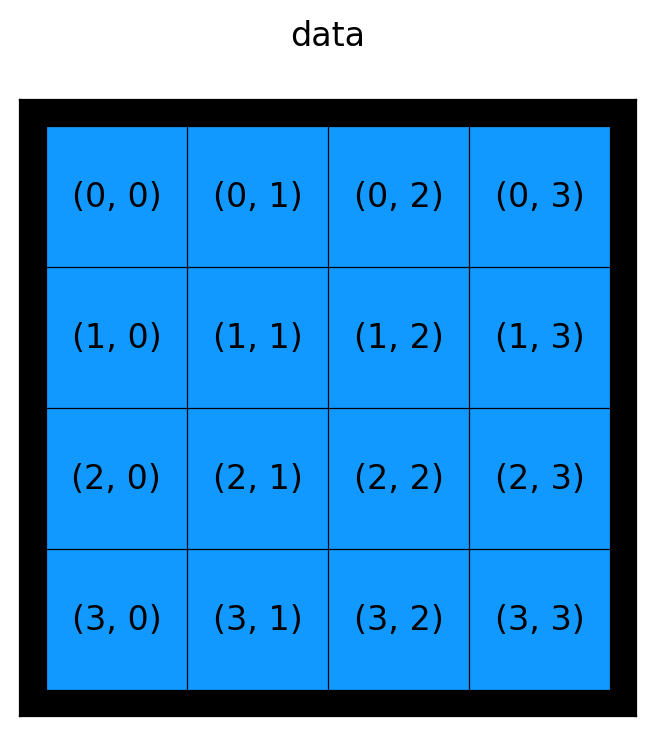

In [352]:
show_array((4, 4), ":, :", "images/array_indexing_1")

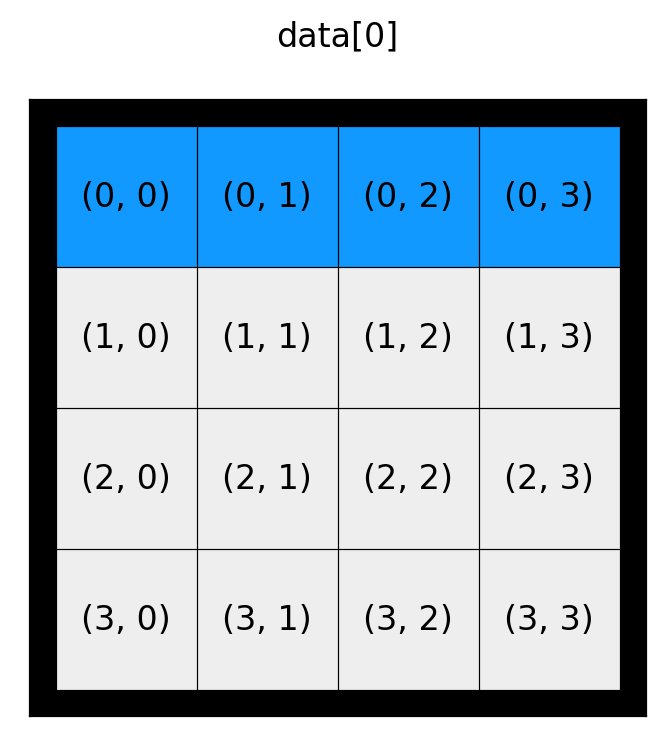

In [ ]:
show_array((4, 4), "0", "images/array_indexing_2")

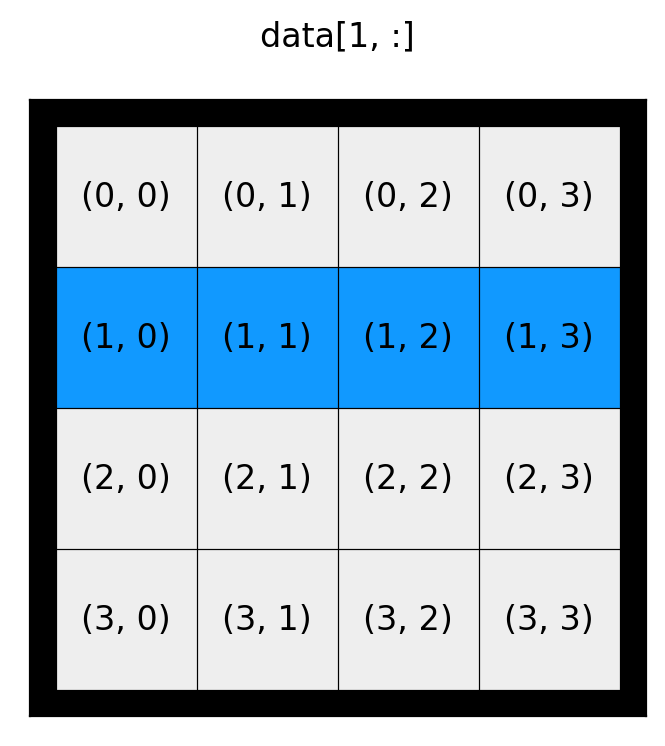

In [ ]:
show_array((4, 4), "1, :", "images/array_indexing_3")

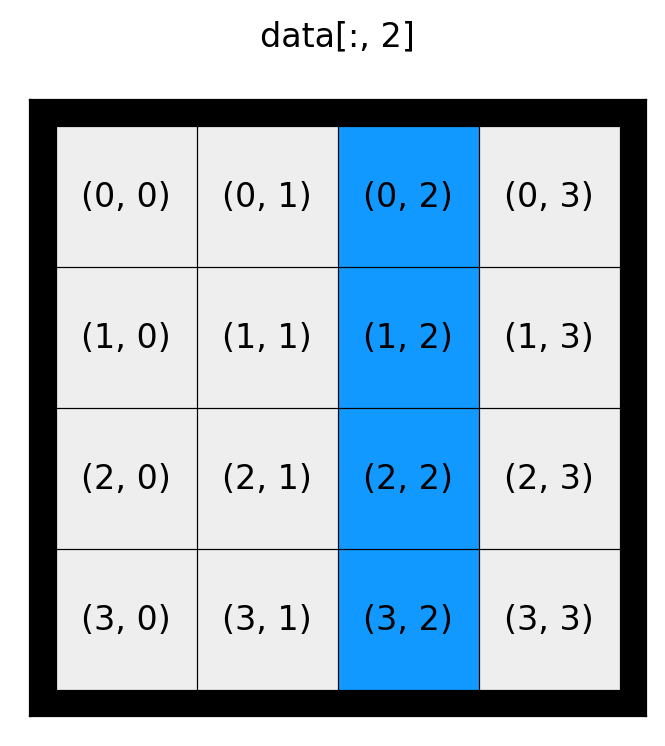

In [ ]:
show_array((4, 4), ":, 2", "images/array_indexing_4")

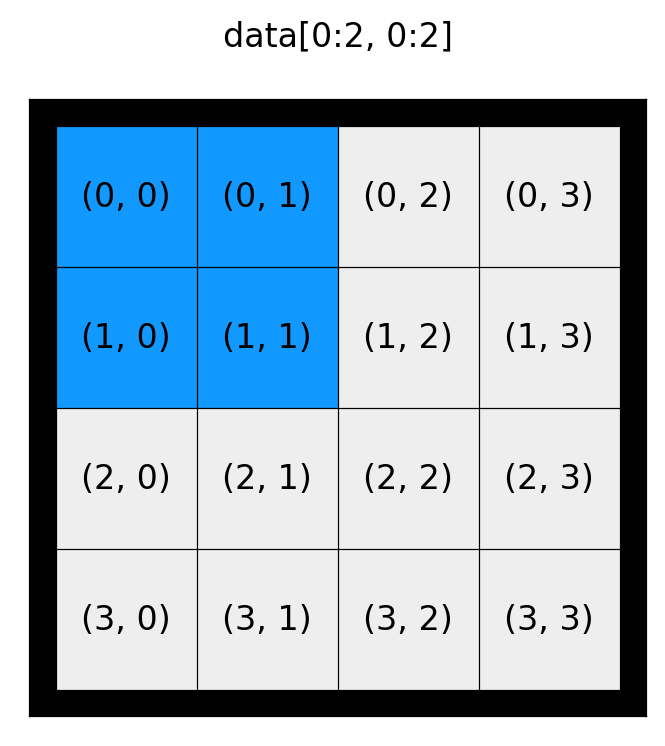

In [ ]:
show_array((4, 4), "0:2, 0:2", "images/array_indexing_5")

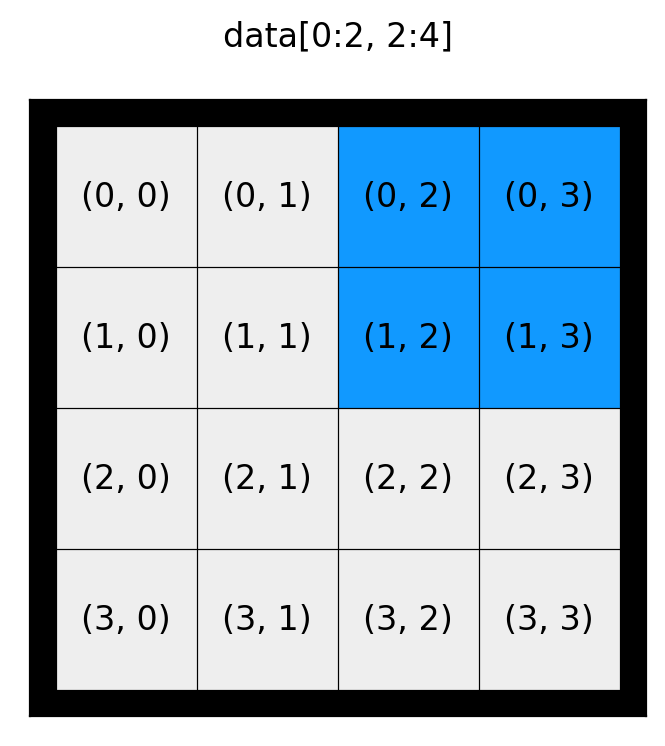

In [ ]:
show_array((4, 4), "0:2, 2:4", "images/array_indexing_6")

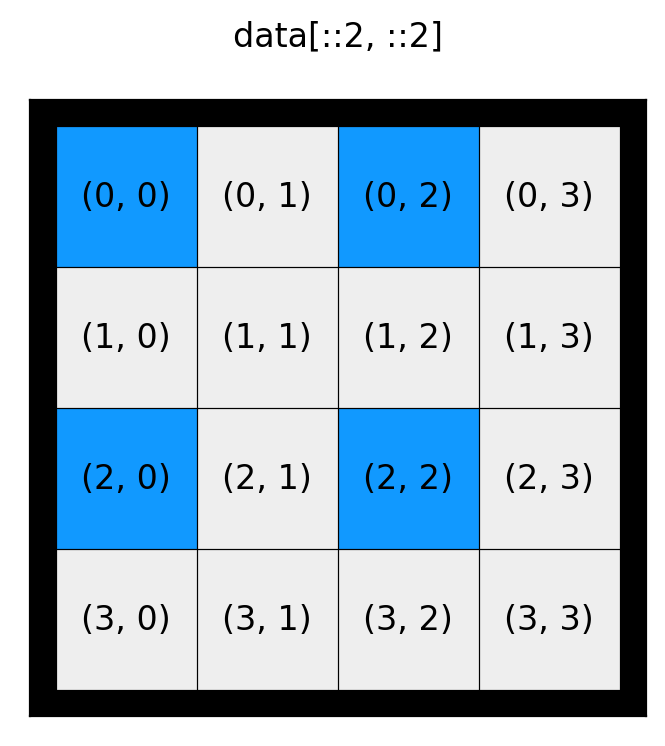

In [ ]:
show_array((4, 4), "::2, ::2", "images/array_indexing_7")

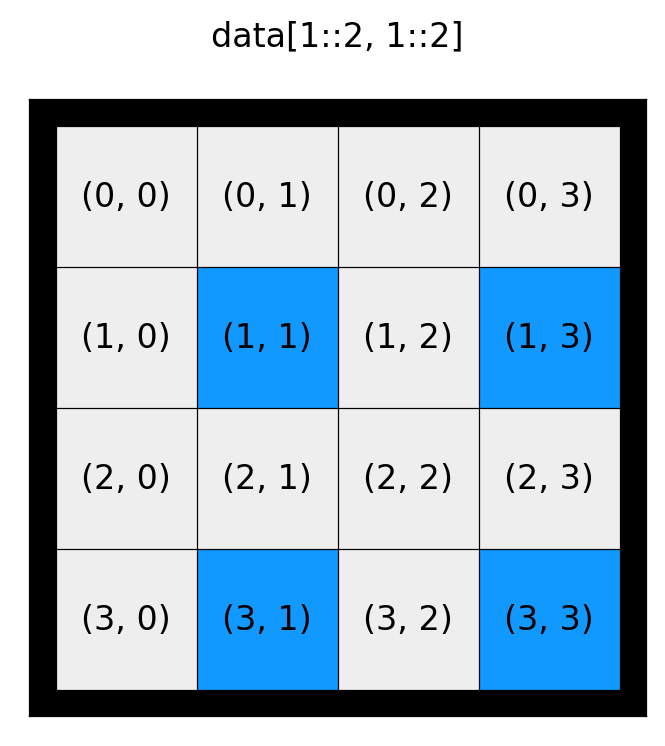

In [ ]:
show_array((4, 4), "1::2, 1::2", "images/array_indexing_8")

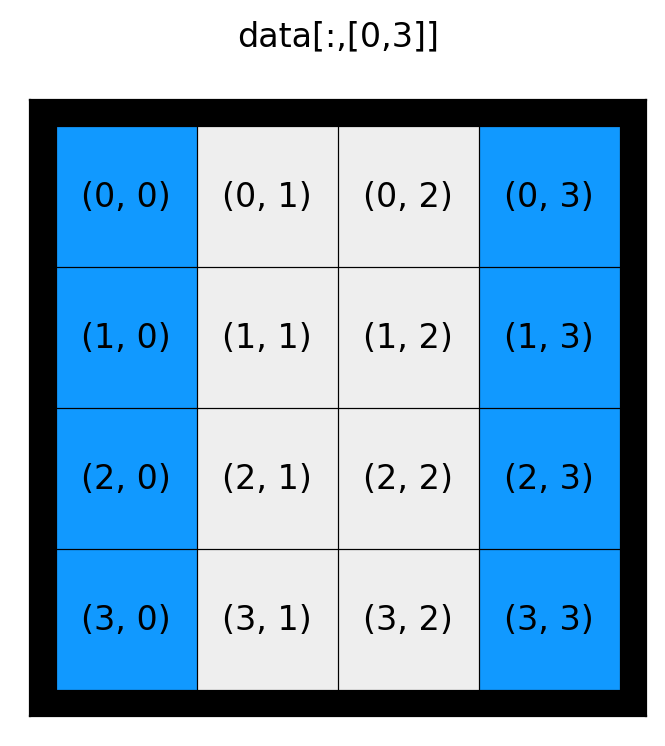

In [ ]:
show_array((4, 4), ":,[0,3]", "images/array_indexing_9")

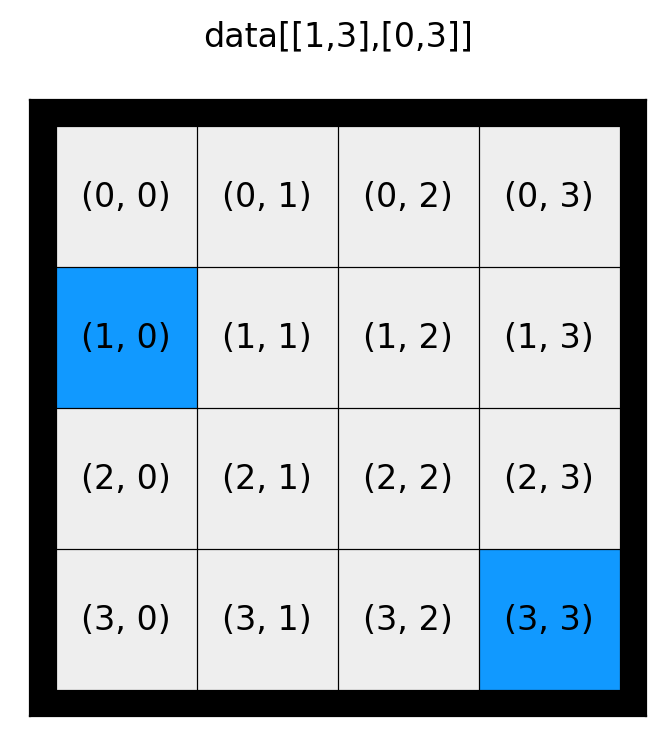

In [ ]:
show_array((4, 4), "[1,3],[0,3]", "images/array_indexing_10")

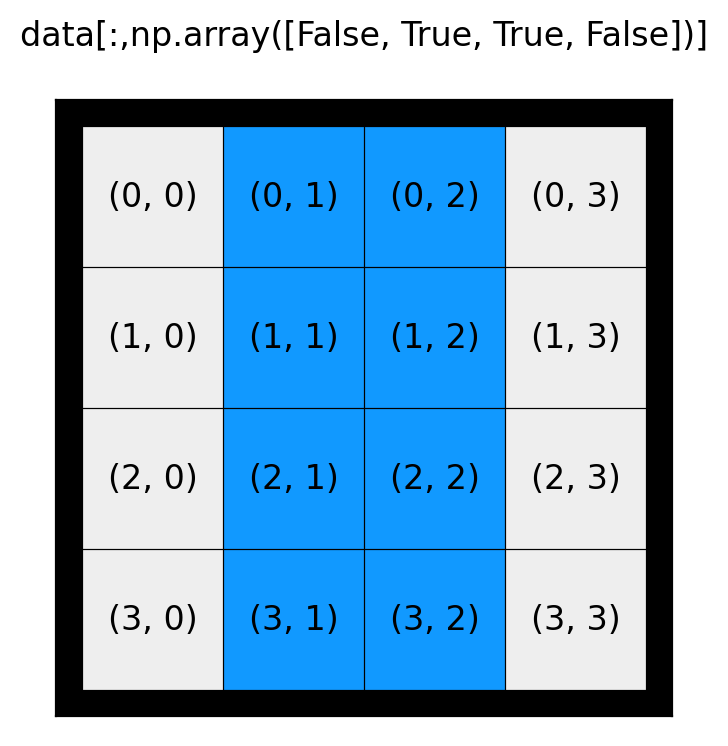

In [ ]:
show_array((4, 4), ":,np.array([False, True, True, False])", "images/array_indexing_11")

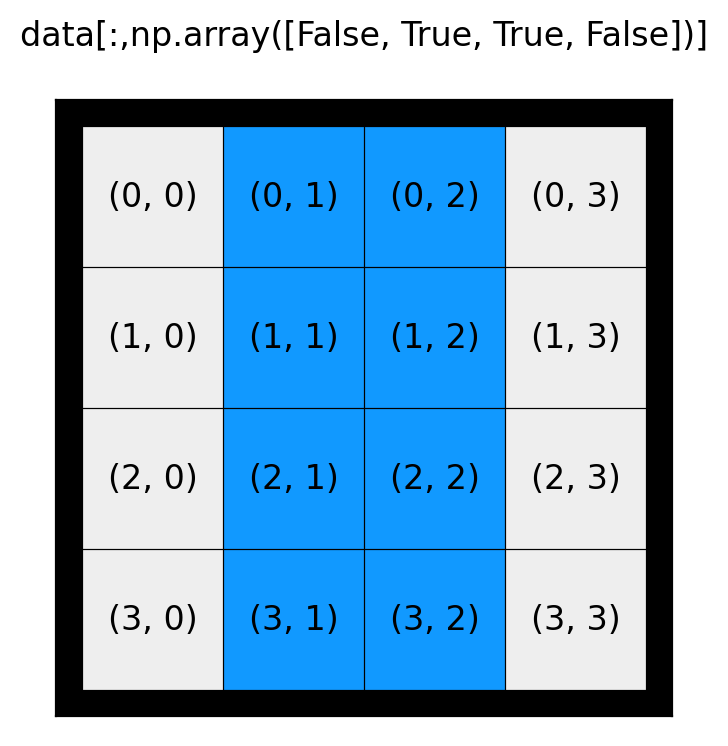

In [ ]:
show_array((4, 4), ":,np.array([False, True, True, False])", "images/array_indexing_12")

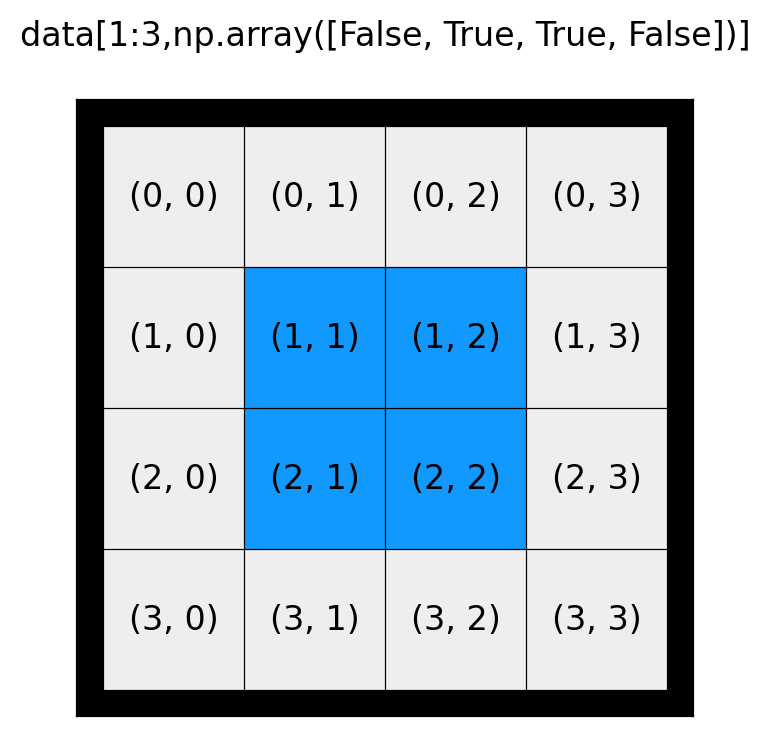

In [ ]:
show_array((4, 4), "1:3,np.array([False, True, True, False])", "images/array_indexing_12")

_**Figure 2-1**_. Visual summary of indexing methods for NumPy arrays. These
diagrams represent NumPy arrays of shape (4, 4), and the highlighted elements
are those that are selected using the indexing expression shown above the block
representations of the arrays.

## Reshaping and resizing

When working with data in array form, it is often useful to rearrange arrays and
alter the way they are interpreted. For example, an N × N matrix array could be
rearranged into a vector of length N2, or a set of one-dimensional arrays could
be concatenated together or stacked next to each other to form a matrix. NumPy
provides a rich set of functions of this type of manipulation. See Table 2-5 for
a summary of a selection of these functions.

_**Table 2-5**_. Summary of NumPy Functions for Manipulating the Dimensions and
the Shape of Arrays

Function/Method | Description
---|---
`np.reshape, np.ndarray.reshape`|reshape an N-dimensional array. The total number of elements must remain the same
`np.ndarray.flatten`| Creates a copy of an N-dimensional array, and reinterpret it as a  one-dimensional array (i.e., all dimensions are collapsed into one).
`np.ravel, np.ndarray.ravel`| Create a view (if possible, otherwise a copy) of an N-dimensional array in which it is interpreted as a one-dimensional array.
`np.squeeze`| Removes axes with length 1.
`np.expand_dims, np.newaxis`| Add a new axis (dimension) of length 1 to an array, where np.newaxis is used with array indexing.
`np.transpose, np.ndarray.transpose, np.ndarray.T`| Transpose the array. The transpose operation corresponds to reversing (or more generally, permuting) the axes of the array.
`np.hstack`| Stacks a list of arrays horizontally (along axis 1): for example, given a list of column vectors, appends the columns to form a matrix.
`np.vstack`| Stacks a list of arrays vertically (along axis 0): for example, given a list of row vectors, appends the rows to form a matrix.
`np.dstack`| Stacks arrays depth-wise (along axis 2).
`np.concatenate`| Creates a new array by appending arrays after each other, along a given axis.
`np.resize`| Resizes an array. Creates a new copy of the original array, with the requested size. If necessary, the original array will be repeated to fill up the new array.
`np.append`| Appends an element to an array. Creates a new copy of the array.
`np.insert`| Inserts a new element at a given position. Creates a new copy of the array.
`np.delete`| Deletes an element at a given position. Creates a new copy of the array.

Reshaping an array does not require modifying the underlying array data; it only
changes in how the data is interpreted, by redefining the array’s strides
attribute.  An example of this type of operation is a 2 × 2 array (matrix) that
is reinterpreted as a 1 × 4 array (vector). In NumPy, the function np.reshape,
or the ndarray class method reshape, can be used to reconfigure how the
underlying data is interpreted. It takes an array and the new shape of the array
as arguments:

In [ ]:
data = np.array([[1, 2], [3, 4]])

In [ ]:
np.reshape(data, (1, 4))

array([[1, 2, 3, 4]])

In [ ]:
data.reshape(4)

array([1, 2, 3, 4])

It is necessary that the requested new shape of the array match the number of
elements in the original size. However, the number of axes (dimensions) does not need
to be conserved, as illustrated in the previous example, where in the first case, the
new array has dimension 2 and shape (1, 4), while in the second case, the new array
has dimension 1 and shape (4,). This example also demonstrates two different ways
of invoking the reshape operation: using the function `np.reshape` and the `ndarray`
method `reshape`. Note that reshaping an array produces a view of the array, and if an
independent copy of the array is needed, the view has to be copied explicitly (e.g., using
`np.copy`).

The `np.ravel` (and its corresponding `ndarray` method) is a special case of reshape,
which collapses all dimensions of an array and returns a flattened one-dimensional
array with a length that corresponds to the total number of elements in the original
array. The `ndarray` method `flatten` performs the same function but returns a copy
instead of a view.

In [ ]:
data = np.array([[1, 2], [3, 4]])

In [ ]:
data

array([[1, 2],
       [3, 4]])

In [ ]:
data.flatten()

array([1, 2, 3, 4])

In [ ]:
data.flatten().shape

(4,)

While `np.ravel` and `np.flatten` collapse the axes of an array into a
one-dimensional array, it is also possible to introduce new axes into an array,
either by using `np.reshape` or, when adding new empty axes, using indexing
notation and the `np.newaxis` keyword at the place of a new axis. In the following
example, the array data has one axis, so it should normally be indexed with a
tuple with one element. However, if it is indexed with a tuple with more than
one element, and if the extra indices in the tuple have the value `np.newaxis`,
then the corresponding new axes are added:

In [ ]:
data = np.arange(0, 5)
data

array([0, 1, 2, 3, 4])

In [ ]:
data.shape

(5,)

In [ ]:
column = data[:, np.newaxis]
column

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [ ]:
column.shape

(5, 1)

In [ ]:
row = data[np.newaxis, :]
row

array([[0, 1, 2, 3, 4]])

In [ ]:
row.shape

(1, 5)

The function `np.expand_dims` can also be used to add new dimensions to an  array,
and in the preceding example, the expression `data[:, np.newaxis]` is  equivalent
to `np.expand_dims(data, axis=1)`, and `data[np.newaxis, :]` is equivalent to
`np.expand_dims(data, axis=0)`. Here the axis argument specifies the location
relative to the existing axes where the new axis is to be inserted.

We have up to now looked at methods to rearrange arrays in ways that do not
affect the underlying data. Earlier in this chapter, we also looked at how to
extract subarrays using various indexing techniques. In addition to reshaping
and selecting subarrays, it is often necessary to merge arrays into bigger
arrays, for example, when joining separately computed or measured data series
into a higher-dimensional array, such as a matrix. For this task, NumPy provides
the functions `np.vstack`, for vertical stacking of, for example, rows into a
matrix, and `np.hstack` for horizontal stacking of, for example, columns into a
matrix. The function `np.concatenate` provides similar functionality, but it takes
a keyword argument axis that specifies the axis along which the arrays are to be
concatenated.

The shape of the arrays passed to `np.hstack`, `np.vstack`, and `np.concatenate` is
important to achieve the desired type of array joining. For example, consider
the following cases: say we have one-dimensional arrays of data, and we want to
stack them vertically to obtain a matrix where the rows are made up of the
one-dimensional arrays.  We can use `np.vstack` to achieve this

In [ ]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [ ]:
data.shape

(5,)

In [ ]:
vdata = np.vstack((data, data, data))
vdata

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [ ]:
vdata.shape

(3, 5)

If we instead want to stack the arrays horizontally, to obtain a matrix where
the arrays are the column vectors, we might first attempt something similar
using `np.hstack`:

In [ ]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [ ]:
data.shape

(5,)

In [ ]:
hdata = np.hstack((data, data, data))
hdata

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
hdata.shape

(15,)

This indeed stacks the arrays horizontally, but not in the way intended here. To
make `np.hstack` treat the input arrays as columns and stack them accordingly, we
need to make the input arrays two-dimensional arrays of shape (1, 5) rather than
one-dimensional arrays of shape (5,). As discussed earlier, we can insert a new
axis by indexing with `np.newaxis`:

In [ ]:
data = data[:, np.newaxis]

In [ ]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

The behavior of the functions for horizontal and vertical stacking, as well as
concatenating arrays using `np.concatenate`, is clearest when the stacked arrays
have the same number of dimensions as the final array and when the input arrays
are stacked along an axis for which they have length 1.  

The number of elements in a NumPy array cannot be changed once the array has
been created. To insert, append, and remove elements from a NumPy array, for
example, using the function `np.append`, `np.insert`, and `np.delete`, a new array
must be created and the data copied to it. It may sometimes be tempting to use
these functions to grow or shrink the size of a NumPy array, but due to the
overhead of creating new arrays and copying the data, it is usually a good idea
to preallocate arrays with size such that they do not later need to be resized.


## Vectorized Expressions

The purpose of storing numerical data in arrays is to be able to process the
data with concise vectorized expressions that represent batch operations that
are applied to all elements in the arrays. Efficient use of vectorized
expressions eliminates the need of many explicit for loops. This results in less
verbose code, better maintainability, and higher-performing code. NumPy
implements functions and vectorized operations corresponding to most fundamental
mathematical functions and operators. Many of these functions and operations act
on arrays on an elementwise basis, and binary operations require all arrays in
an expression to be of compatible size. The meaning of compatible size is
normally that the variables in an expression represent either scalars or arrays
of the same size and shape. More generally, a binary operation involving two
arrays is well defined if the arrays can be `broadcasted` into the same shape
and size.

In the case of an operation between a scalar and an array, broadcasting refers
to the scalar being distributed and the operation applied to each element in the
array. When an expression contains arrays of unequal sizes, the operations may
still be well defined if the smaller of the array can be broadcasted
(“effectively expanded”) to match the larger array according to NumPy’s
broadcasting rule: an array can be broadcasted over another array if their axes
on a one-by-one basis either have the same length or if either of them have
length 1. If the number of axes of the two arrays is not equal, the array with
fewer axes is padded with new axes of length 1 from the left until the numbers
of dimensions of the two arrays agree.

Two simple examples that illustrate array broadcasting are shown in Figure 2-2:
a 3 × 3 matrix is added to a 1 × 3 row vector and a 3 × 1 column vector,
respectively, and in both cases the result is a 3 × 3 matrix. However, the
elements in the two resulting matrices are different, because the way the
elements of the row and column vectors are broadcasted to the shape of the
larger array is different depending on the shape of the arrays, according to
NumPy’s broadcasting rule.

![Figure 2.2](/home/juan/PycharmProjects/PycharmProjectsAorus/NumericalPython/images/fig2-2.png)

_**Figure 2-2**. Visualization of broadcasting of row and column vectors into
the shape of a matrix. The highlighted elements represent true elements of the
arrays, while the light gray-shaded elements describe the broadcasting of the
elements of the array of smaller size._

### Arithmetic operations

The standard arithmetic operations with NumPy arrays perform elementwise
operations. Consider, for example, the addition, subtraction, multiplication,
and division of equal-sized arrays:

In [ ]:
x = np.array([[1, 2], [3, 4]])

In [ ]:
y = np.array([[5, 6], [7, 8]])

In [ ]:
x + y

array([[ 6,  8],
       [10, 12]])

In [ ]:
y - x

array([[4, 4],
       [4, 4]])

In [ ]:
x * y

array([[ 5, 12],
       [21, 32]])

In [ ]:
y / x

array([[5.        , 3.        ],
       [2.33333333, 2.        ]])

In operations between scalars and arrays, the scalar value is applied to each
element in the array, as one could expect:

In [ ]:
x * 2

array([[2, 4],
       [6, 8]])

In [ ]:
2 ** x

array([[ 2,  4],
       [ 8, 16]])

In [ ]:
y / 2

array([[2.5, 3. ],
       [3.5, 4. ]])

In [ ]:
(y / 2).dtype

dtype('float64')

Note that the dtype of the resulting array for an expression can be promoted if
the computation requires it, as shown in the preceding example with division
between an integer array and an integer scalar, which in that case resulted in
an array with a dtype that is `np.float64`.

If an arithmetic operation is performed on arrays with incompatible size or
shape, a ValueError exception is raised:

In [ ]:
x = np.array([1, 2, 3, 4]).reshape(2,2)

In [ ]:
z = np.array([1, 2, 3, 4])

In [ ]:
x / z

ValueError: operands could not be broadcast together with shapes (2,2) (4,) 

Here the array x has shape (2, 2) and the array z has shape (4,), which cannot
be broadcasted into a form that is compatible with (2, 2). If, on the other
hand, z has shape (2,), (2, 1), or (1, 2), then it can broadcasted to the shape
(2, 2) by effectively repeating the array z along the axis with length 1. Let’s
first consider an example with an array z of shape (1, 2), where the first axis
(axis 0) has length 1:

In [ ]:
z = np.array([[2, 4]])

In [ ]:
z

array([[2, 4]])

In [ ]:
z.shape

(1, 2)

Dividing the array x with array z is equivalent to dividing x with an array zz
that is constructed by repeating (here using `np.concatenate`) the row vector z
to obtain an array zz that has the same dimensions as x:

In [ ]:
x / z

array([[0.5, 0.5],
       [1.5, 1. ]])

In [ ]:
zz = np.concatenate([z, z], axis=0)

In [ ]:
zz

array([[2, 4],
       [2, 4]])

In [ ]:
x / zz

array([[0.5, 0.5],
       [1.5, 1. ]])

Let’s also consider the example in which the array z has shape (2, 1) and where
the second axis (axis 1) has length 1:

In [ ]:
z = np.array([[2], [4]])

In [ ]:
z.shape

(2, 1)

In [ ]:
x / z

array([[0.5 , 1.  ],
       [0.75, 1.  ]])

In [ ]:
zz = np.concatenate([z, z], axis=1)

In [ ]:
zz

array([[2, 2],
       [4, 4]])

In [ ]:
x / zz

array([[0.5 , 1.  ],
       [0.75, 1.  ]])

In summary, these examples show how arrays with shape (1, 2) and (2, 1) are
broadcasted to the shape (2, 2) of the array x when the operation x / z is
performed.  In both cases, the result of the operation x / z is the same as
first repeating the smaller array z along its axis of length 1 to obtain a new
array zz with the same shape as x and then performing the equal-sized array
operation x / zz. However, the implementation of the broadcasting does not
explicitly perform this expansion and the corresponding memory copies, but it
can be helpful to think of the array broadcasting in these terms.  

A summary of the operators for arithmetic operations with NumPy arrays is given
in Table 2-6.  These operators use the standard symbols used in Python. The
result of an arithmetic operation with one or two arrays is a new independent
array, with its own data in the memory. Evaluating complicated arithmetic
expression might therefore trigger many memory allocation and copy operations,
and when working with large arrays, this can lead to a large memory footprint
and impact the performance negatively.  In such cases, using inplace operation
(see Table 2-6) can reduce the memory footprint and improve performance. As an
example of inplace operators, consider the following two statements, which have
the same effect:

In [ ]:
x = np.array([[1, 3], [2, 4]])
x = x + y
x

array([[ 6,  9],
       [ 9, 12]])

In [ ]:
x = np.array([[1, 3], [2, 4]])
x += y
x

array([[ 6,  9],
       [ 9, 12]])

_**Table 2-6**. Operators for Elementwise Arithmetic Operation on NumPy Arrays_

Operator|Operation
---|---
+, +=|Addition
-, -=|subtraction
*, *=|Multiplication
/, /=|division
//, //=|Integer division
**, **=|exponentiation

The two expressions have the same effect, but in the first case, x is reassigned
to a new array, while in the second case, the values of array x are updated
inplace. Extensive use of inplace operators tends to impair code readability,
and inplace operators should therefore be used only when necessary.

### Elementwise functions

In addition to arithmetic expressions using operators, NumPy provides vectorized
functions for elementwise evaluation of many elementary mathematical functions
and operations. Table 2-7 gives a summary of elementary mathematical functions
in NumPy.`(3)` Each of these functions takes a single array (of arbitrary dimension)
as input and returns a new array of the same shape, where for each element the
function has been applied to the corresponding element in the input array. The
data type of the output array is not necessarily the same as that of the input
array.

`(3)` Note that this is not a complete list of the available elementwise
functions in NumPy. See the NumPy reference documentations for comprehensive
lists.

_**Table 2-7**_. Selection of NumPy Functions for Elementwise Elementary
Mathematical Functions

NumPy Function | Description
---|---
`np.cos, np.sin, np.tan` | Trigonometric functions.
`np.arccos, np.arcsin, np.arctan` |Inverse trigonometric functions.
`np.cosh, np.sinh, np.tanh`| hyperbolic trigonometric functions.
`np.arccosh, np.arcsinh, np.arctanh`| Inverse hyperbolic trigonometric functions.
`np.sqrt`|square root.
`np.exp`|exponential.
`np.log, np.log2, np.log10`| logarithms of base e, 2, and 10, respectively.

For example, the `np.sin` function (which takes only one argument) is used to
compute the sine function for all values in the array:

In [ ]:
x = np.linspace(-1, 1, 11)

In [ ]:
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [ ]:
y = np.sin(np.pi * x)

In [ ]:
np.round(y, decimals=4)

array([-0.    , -0.5878, -0.9511, -0.9511, -0.5878,  0.    ,  0.5878,
        0.9511,  0.9511,  0.5878,  0.    ])

Here we also used the constant `np.pi` and the function `np.round` to round the
values of y to four decimals. Like the `np.sin` function, many of the elementary
math functions take one input array and produce one output array. In contrast,
many of the mathematical operator functions (Table 2-8) operates on two input
arrays returns one array:

In [ ]:
np.add(np.sin(x) ** 2, np.cos(x) ** 2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.sin(x) ** 2 + np.cos(x) ** 2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

_**Table 2-8**. Summary of NumPy Functions for Elementwise Mathematical
Operations_

NumPy Function|Description
---|---
`np.add, np.subtract, np.multiply, np.divide`|Addition, subtraction, multiplication, and division of two NumPy arrays.
`np.power`|raises first input argument to the power of the second input argument (applied elementwise).
`np.remainder`| The remainder of division.
`np.reciprocal`|The reciprocal (inverse) of each element.
`np.real, np.imag, np.conj`|The real part, imaginary part, and the complex conjugate of the elements in the input arrays.
`np.sign, np.abs`| The sign and the absolute value.
`np.floor, np.ceil, np.rint`| Convert to integer values.
`np.round`| Rounds to a given number of decimals.

Note that in this example, np.add and the operator + are equivalent, and for
normal use the operator should be used.

Occasionally it is necessary to define new functions that operate on NumPy
arrays on an element-by-element basis. A good way to implement such functions is
to express it in terms of already existing NumPy operators and expressions, but
in cases when this is not possible, the `np.vectorize` function can be a
convenient tool. This function takes a nonvectorized function and returns a
vectorized function. For example, consider`the following implementation of the
Heaviside step function, which works for scalar input:

In [ ]:
def heaviside(x):
    return 1 if x > 0 else 0

In [ ]:
heaviside(-1)

0

In [ ]:
heaviside(1.5)

1

However, unfortunately this function does not work for NumPy array input:

In [ ]:
x = np.linspace(-5, 5, 11)

In [ ]:
heaviside(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Using `np.vectorize` the scalar Heaviside function can be converted into a
vectorized function that works with NumPy arrays as input:

In [ ]:
heaviside = np.vectorize(heaviside)

In [ ]:
heaviside(x)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Although the function returned by `np.vectorize` works with arrays, it will be
relatively slow since the original function must be called for each element in
the array.  There are much better ways to implementing this particular function
using arithmetic with Boolean-valued arrays, as discussed later in this chapter:

In [ ]:
def heaviside(x):
    return 1.0 * (x > 0)

Nonetheless, np.vectorize can often be a quick and convenient way to vectorize a
function written for scalar input.

In addition to NumPy’s functions for elementary mathematical function, as
summarized in Table 2-7, there are also numerous functions in NumPy for
mathematical operations. A summary of a selection of these functions is given in
Table 2-8.

### Aggregate functions

NumPy provides another set of functions for calculating aggregates for NumPy
arrays, which take an array as input and by default return a scalar as output.
For example, statistics such as averages, standard deviations, and variances of
the values in the input array, and functions for calculating the sum and the
product of elements in an array, are all aggregate functions.

A summary of aggregate functions is given in Table 2-9. All of these functions
are also available as methods in the ndarray class. For example, `np.mean(data)`
and `data.mean()` in the following example are equivalent:

In [ ]:
data = np.random.normal(size=(15,15))

In [ ]:
np.mean(data)

-0.10632972556145782

In [ ]:
data.mean()

-0.10632972556145782

_**Table 2-9**. NumPy Functions for Calculating Aggregates of NumPy Arrays_

NumPy Function | Description
---|---
`np.mean`| The average of all values in the array.
`np.std` | standard deviation.
`np.var` | Variance.
`np.sum` | sum of all elements.
`np.prod`| Product of all elements.
`np.cumsum`| Cumulative sum of all elements.
`np.cumprod`| Cumulative product of all elements.
`np.min, np.max`| The minimum/maximum value in an array.
`np.argmin, np.argmax`| The index of the minimum/maximum value in an array.
`np.all` | returns True if all elements in the argument array are nonzero.
`np.any` | returns True if any of the elements in the argument array is nonzero.

By default, the functions in Table 2-9 aggregate over the entire input array.
Using the axis keyword argument with these functions, and their corresponding
ndarray methods, it is possible to control over which axis in the array
aggregation is carried out.  The axis argument can be an integer, which
specifies the axis to aggregate values over.  In many cases the axis argument
can also be a tuple of integers, which specifies multiple axes to aggregate
over. The following example demonstrates how calling the aggregate function
np.sum on the array of shape (5, 10, 15) reduces the dimensionality of the array
depending on the values of the axis argument:

In [ ]:
data = np.random.normal(size=(5, 10, 15))

In [ ]:
data.sum(axis=0).shape

(10, 15)

In [ ]:
data.sum(axis=(0, 2)).shape

(10,)

In [ ]:
data.sum()

12.107645789823975

A visual illustration of how aggregation over all elements, over the first axis, and over
the second axis of a 3 × 3 array is shown in Figure 2-3. In this example, the data array is
filled with integers between 1 and 9:

In [ ]:
data = np.arange(1,10).reshape(3,3)

In [ ]:
data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

![figure 2.3](/home/juan/PycharmProjects/PycharmProjectsAorus/NumericalPython/images/fig2-3.png)

_**Figure 2-3**. Illustration of array aggregation functions along all axes (left), the first
axis (center), and the second axis (right) of a two-dimensional array of shape 3 × 3_

and we compute the aggregate sum of the entire array, over the axis 0, and over
axis 1, respectively:

In [ ]:
data.sum()

45

In [ ]:
data.sum(axis=0)

array([12, 15, 18])

In [ ]:
data.sum(axis=1)

array([ 6, 15, 24])

### Boolean arrays and conditional expressions

When computing with NumPy arrays, there is often a need to compare elements in
different arrays and perform conditional computations based on the results of
such comparisons. Like with arithmetic operators, NumPy arrays can be used with
the usual comparison operators, for example, >, <, >=, <=, ==, and !=, and the
comparisons are made on an element-by-element basis. The broadcasting rules also
apply to comparison operators, and if two operators have compatible shapes and
sizes, the result of the comparison is a new array with Boolean values (with
dtype as np.bool) that gives the result of the comparison for each element:

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
b = np.array([4, 3, 2, 1])

In [ ]:
a < b

array([ True,  True, False, False])

To use the result of a comparison between arrays in, for example, an if
statement, we need to aggregate the Boolean values of the resulting arrays in
some suitable fashion, to obtain a single `True` or `False` value. A common use-case
is to apply the `np.all` or `np.any` aggregation functions, depending on the
situation at hand:

In [ ]:
np.all(a < b)

False

In [ ]:
np.any(a < b)

True

In [ ]:
if np.all(a < b):
    print("All elements in a are smaller than their corresponding element in b")
elif np.any(a < b):
    print("Some elements in a are smaller than their corresponding elemment in b")
else:
    print("All elements in b are smaller than their corresponding element in a")

Some elements in a are smaller than their corresponding elemment in b


The advantage of Boolean-valued arrays, however, is that they often make it possible
to avoid conditional if statements altogether. By using Boolean-valued arrays in
arithmetic expressions, it is possible to write conditional computations in vectorized
form. When appearing in an arithmetic expression together with a scalar number, or
another NumPy array with a numerical data type, a Boolean array is converted to a
numerical- valued array with values 0 and 1 inplace of False and True, respectively.

In [ ]:
x = np.array([-2, -1, 0, 1, 2])

In [ ]:
x > 0

array([False, False, False,  True,  True])

In [ ]:
1 * (x > 0)

array([0, 0, 0, 1, 1])

In [ ]:
x * (x > 0)

array([0, 0, 0, 1, 2])

This is a useful property for conditional computing, such as when defining
piecewise functions. For example, if we need to define a function describing a
pulse of a given height, width, and position, we can implement this function by
multiplying the height  (a scalar variable) with two Boolean-valued arrays for
the spatial extension of the pulse:

In [ ]:
def pulse(x, position, height, width):
    return height * (x >= position) * (x <= (position + width))

In [ ]:
x = np.linspace(-5, 5, 11)

In [ ]:
pulse(x, position=-2, height=1, width=5)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
pulse(x, position=1, height=1, width=5)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In this example, the expression `(x >= position) * (x <= (position + width))` is a
multiplication of two Boolean-valued arrays, and for this case the
multiplication operator acts as an elementwise AND operator. The function pulse
could also be implemented using NumPy’s function for elementwise AND operations,
`np.logical_and`:

In [ ]:
def pulse(x, position, height, width):
    return height * np.logical_and(x >= position, x <= (position + width))

There are also functions for other logical operations, such as NOT, OR, and XOR,
and functions for selectively picking values from different arrays depending on
a  given condition `np.where`, a list of conditions `np.select`, and an array of
indices `np.choose`. See Table 2-10 for a summary of such functions, and the
following examples demonstrate the basic usage of some of these functions. The
`np.where` function selects elements from two arrays (second and third arguments),
given a Boolean-valued array condition (the first argument). For elements where
the condition is True, the corresponding values from the array given as second
argument are selected, and if the condition is False, elements from the third
argument array are selected:

In [ ]:
x = np.linspace(-4, 4, 9)

In [ ]:
np.where(x < 0, x**2, x**3)

array([16.,  9.,  4.,  1.,  0.,  1.,  8., 27., 64.])

_**Table 2-10**. NumPy Functions for Conditional and Logical Expressions_

Function  | Description
---|---
`np.where`| Chooses values from two arrays depending on the value of a condition array.
`np.choose`| Chooses values from a list of arrays depending on the values of a given index array.
`np.select` | Chooses values from a list of arrays depending on a list of conditions.
`np.nonzero`| returns an array with indices of nonzero elements.
`np.logical_and`| Performs an elementwise ANd operation.
`np.logical_or, np.logical_xor`| elementwise or/Xor operations.
`np.logical_not`| elementwise NoT operation (inverting).

The `np.select` function works similarly, but instead of a Boolean-valued
condition array, it expects a list of Boolean-valued condition arrays and a
corresponding list of value arrays:

In [ ]:
np.select([x < -1, x < 2, x >= 2],
          [x**2  , x**3 , x**4])

array([ 16.,   9.,   4.,  -1.,   0.,   1.,  16.,  81., 256.])

The `np.choose` takes as a first argument a list or an array with indices that
determine from which array in a given list of arrays an element is picked from:

In [ ]:
np.choose([0, 0, 0, 1, 1, 1, 2, 2, 2],
          [x**2,    x**3,    x**4])

array([ 16.,   9.,   4.,  -1.,   0.,   1.,  16.,  81., 256.])

The function `np.nonzero` returns a tuple of indices that can be used to index
the array (e.g., the one that the condition was based on). This has the same
results as indexing the array directly with `abs(x) > 2`, but it uses fancy
indexing with the indices returned by `np.nonzero` rather than Boolean-valued
array indexing.

In [ ]:
x[abs(x) > 2]

array([-4., -3.,  3.,  4.])

In [ ]:
np.nonzero(abs(x) > 2)

(array([0, 1, 7, 8]),)

In [ ]:
x[np.nonzero(abs(x) > 2)]

array([-4., -3.,  3.,  4.])

# Set operations

The Python language provides a convenient set data structure for managing
unordered collections of unique objects. The NumPy array class `ndarray` can also
be used to describe such sets, and NumPy contains functions for operating on
sets stored as NumPy arrays. These functions are summarized in Table 2-11. Using
NumPy arrays to describe and operate on sets allows expressing certain
operations in vectorized form.  For example, testing if the values in a NumPy
array are included in a set can be done using the `np.in1d` function, which tests
for the existence of each element of its first argument in the array passed as
the second argument. To see how this works, consider the following example:
first, to ensure that a NumPy array is a proper set, we can use the `np.unique`
function, which returns a new array with unique values:

In [ ]:
a = np.unique([1,2,3,3])

In [ ]:
b = np.unique([2,3,4,4,5,6,5])

In [ ]:
np.in1d(a, b)

array([False,  True,  True])

_**Table 2-11**. NumPy Functions for Operating on Sets_

Function | Description
---|---
`np.unique`| Creates a new array with unique elements, where each value only appears once.
`np.in1d`| Tests for the existence of an array of elements in another array.
`np.intersect1d`| Returns an array with elements that are contained in two given arrays.
`np.setdiff1d`| Returns an array with elements that are contained in one, but not the other, of two given arrays.
`np.union1d`| Returns an array with elements that are contained in either, or both, of two given arrays.

Here, the existence of each element in a in the set b was tested, and the result
is a Boolean-valued array. Note that we can use the in keyword to test for the
existence of single elements in a set represented as NumPy array:

In [ ]:
1 in a

True

In [ ]:
1 in b

False

To test if a is a subset of b, we can use the `np.in1d`, as in the previous
example, together with the aggregation function `np.all` (or the corresponding
ndarray method):

In [ ]:
np.all(np.in1d(a, b))

False

The standard set operations union (the set of elements included in either or
both sets), intersection (elements included in both sets), and difference
(elements included in one of the sets but not the other) are provided by
`np.union1d`, `np.intersect1d`, and `np.setdiff1d`, respectively:

In [ ]:
np.union1d(a, b)

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.intersect1d(a, b)

array([2, 3])

In [ ]:
np.setdiff1d(a, b)

array([1])

In [ ]:
np.setdiff1d(b, a)

array([4, 5, 6])

### Operations on arrays

In addition to elementwise and aggregation functions, some operations act on
arrays as a whole and produce a transformed array of the same size. An example
of this type of operation is the transpose, which flips the order of the axes of
an array. For the special case of a two-dimensional array, i.e., a matrix, the
transpose simply exchanges rows and columns:

In [ ]:
data = np.arange(9).reshape(3, 3)

In [ ]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.transpose(data)

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

The transpose function `np.transpose` also exists as a method in `ndarray` and as
the special method name `ndarray.T`. For an arbitrary N-dimensional array, the
transpose operation reverses all the axes, as can be seen from the following
example (note that the shape attribute is used here to display the number of
values along each axis of the array) :

In [ ]:
data = np.random.randn(1, 2, 3, 4, 5)

In [ ]:
data.shape

(1, 2, 3, 4, 5)

In [ ]:
data.T.shape

(5, 4, 3, 2, 1)

The `np.fliplr` (flip left-right) and `np.flipud` (flip up-down) functions perform
operations that are similar to the transpose: they reshuffle the elements of an array so
that the elements in rows (`np.fliplr`) or columns (`np.flipud`) are reversed, and the
shape of the output array is the same as the input. The `np.rot90` function rotates the
elements in the first two axes in an array by 90 degrees, and like the transpose function,
it can change the shape of the array. Table 2-12 gives a summary of NumPy functions for
common array operations.

_**Table 2-12**. Summary of NumPy Functions for Array Operations_

Function | Description
---|---
`np.transpose,np.ndarray.transpose, np.ndarray.T`| The transpose (reverse axes) of an array.
`np.fliplr/np.flipud`| Reverse the elements in each row/column.
`np.rot90`| Rotates the elements along the first two axes by 90 degrees.
`np.sort, np.ndarray.sort`| sort the elements of an array along a given specified axis (which default to the last axis of the array). The np.ndarray method sort performs the sorting in place, modifying the input array.

## Matrix and vector operations

We have so far discussed general N-dimensional arrays. One of the main
applications of such arrays is to represent the mathematical concepts of
vectors, matrices, and tensors, and in this use-case, we also frequently need to
calculate vector and matrix operations such as scalar (inner) products, dot
(matrix) products, and tensor (outer) products. A summary of NumPy’s functions
for matrix operations is given in Table 2-13.

_**Table 2-13**. Summary of NumPy Functions for Matrix Operations_
NumPy Function | Description
---|---
`np.dot` | Matrix multiplication (dot product) between two given arrays representing vectors, arrays, or tensors.
`np.inner`| scalar multiplication (inner product) between two arrays representing vectors.
`np.cross`| The cross product between two arrays that represent vectors.
`np.tensordot`| dot product along specified axes of multidimensional arrays.
`np.outer`| outer product (tensor product of vectors) between two arrays representing vectors.
`np.kron`| Kronecker product (tensor product of matrices) between arrays representing matrices and higher-dimensional arrays.
`np.einsum`| evaluates einstein’s summation convention for multidimensional arrays.

In NumPy, the * operator is used for elementwise multiplication. For two
two-dimensional arrays A and B, the expression A * B therefore does not compute
a matrix product (in contrast to many other computing environments). Currently
there is no operator for denoting matrix multiplication,`(4)` and instead the
NumPy function `np.dot` is used for this purpose. There is also a corresponding
method in the ndarray class. To compute the product of two matrices A and B, of
size N × M and M × P, which results in a matrix of size N × P, we can use:

`(4)` Python recently adopted the @ symbol for denoting matrix multiplication,
and as of Python 3.5, this operator is now available. However, at the time of
writing, this operator is still not widely used. See
http://legacy.python.org/dev/peps/pep-0465 for details.

In [ ]:
A = np.arange(1, 7).reshape(2, 3)

In [ ]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
B = np.arange(1, 7).reshape(3, 2)

In [ ]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [ ]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

The `np.dot` function can also be used for matrix-vector multiplication (i.e.,
multiplication of a two-dimensional array, which represents a matrix, with a
one-dimensional array representing a vector). For example,

In [ ]:
A = np.arange(9).reshape(3, 3)

In [ ]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
x = np.arange(3)

In [ ]:
x

array([0, 1, 2])

In [ ]:
np.dot(A, x)

array([ 5, 14, 23])

In this example, x can be either a two-dimensional array of shape (1, 3) or a
one-dimensional array with shape (3,). In addition to the function np.dot,
there is also a corresponding method dot in ndarray, which can be used as in the
following example:

In [ ]:
A.dot(x) # (3,3) dot (3,) A-rows * x.col (x is a vertical vector)

array([ 5, 14, 23])

In [ ]:
x.dot(A) # (3,) dot (3,3) x-row * A.col (x is a horizontal vector)

array([15, 18, 21])

In [ ]:
x.reshape(3,1) #column array
A.dot(x)

array([ 5, 14, 23])

In [ ]:
x.reshape(1,3) #row array
x.dot(A)

array([15, 18, 21])

Unfortunately, nontrivial matrix multiplication expressions can often become
complex and hard to read when using either `np.dot` or `np.ndarray.dot`. For
example, even a relatively simple matrix expression like the one for a
similarity transform, A′ = BAB−1, must be represented with relatively cryptic
nested expressions, `5` such as either

`5` With the new infix matrix multiplication operator, this same expression can be expressed as the
considerably more readable: `Ap = B @ A @ np.linalg.inv(B)`.

In [ ]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [ ]:
Ap = np.dot(B, np.dot(A, np.linalg.inv(B)))

or

In [ ]:
Ap = B.dot(A.dot(np.linalg.inv(B)))

To improve this situation, NumPy provides an alternative data structure to
`ndarray` named `matrix`, for which expressions like A * B are implemented as
matrix multiplication. It also provides some convenient special attributes, like
`matrix.I` for the inverse matrix and `matrix.H` for the complex conjugate
transpose of a matrix. Using instances of this `matrix` class, one can therefore
use the vastly more readable expression:

In [ ]:
A = np.matrix(A)

In [ ]:
B = np.matrix(B)

In [ ]:
Ap = B * A * B.I

This may seem like a practical compromise, but unfortunately using the `matrix`
class does have a few disadvantages, and its use is therefore often discouraged.
The main objection against using `matrix` is that expression like A * B is then
context dependent: that is, it is not immediately clear if A * B denotes
elementwise or matrix multiplication, because it depends on the type of A and B,
and this creates another code-readability problem. This can be a particularly
relevant issue if A and B are user-supplied arguments to a function, in which
case it would be necessary to cast all input arrays explicitly to matrix
instances, using, for example, `np.asmatrix` or the function `np.matrix` (since
there would be no guarantee that the user calls the function with arguments of
type matrix rather than ndarray). The `np.asmatrix` function creates a view of
the original array in the form of an `np.matrix` instance. This does not add
much in computational costs, but explicitly casting arrays back and forth
between `ndarray` and `matrix` offset much of the benefits of the improved
readability of matrix expressions. A related issue is that some functions that
operate on arrays and matrices might not respect the type of the input and may
return an ndarray even though it was called with an input argument of type
matrix. This way, a matrix of type matrix might be unintentionally converted to
ndarray, which in turn would change the behavior of expressions like  A * B.
This type of behavior is not likely to occur when using NumPy’s array and matrix
functions, but it is not unlikely to happen when using functions from other
packages.  However, in spite of all the arguments for not using matrix matrices
too extensively, personally I think that using matrix class instances for
complicated matrix expressions is an important use-case, and in these cases, it
might be a good idea to explicitly cast arrays to matrices before the
computation and explicitly cast the result back to the ndarray type, following
the pattern:

In [ ]:
A = np.asmatrix(A)

In [ ]:
B = np.asmatrix(B)

In [ ]:
Ap = B * A * B.I

In [ ]:
Ap = np.asarray(Ap)

The inner product (scalar product) between two arrays representing vectors can be
computed using the `np.inner` function:

In [ ]:
np.inner(x, x)

5

or, equivalently, using `np.dot`:

In [ ]:
np.dot(x, x)

5

The main difference is that np.inner expects two input arguments with the same
dimension, while `np.dot` can take input vectors of shape 1 × N and N × 1,
respectively:

In [ ]:
y = x[:, np.newaxis]

In [ ]:
y

array([[0],
       [1],
       [2]])

In [ ]:
np.dot(y.T, y)

array([[5]])

While the inner product maps two vectors to a scalar, the outer product performs
the complementary operation of mapping two vectors to a matrix.

In [ ]:
x = np.array([1, 2, 3])

In [ ]:
np.outer(x, x)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

The outer product can also be calculated using the Kronecker product using the
function `np.kron`, which, however, in contrast to np.outer, produces an output
array of shape (M*P, N*Q) if the input arrays have shapes (M, N) and (P, Q),
respectively. Thus, for the case of two one-dimensional arrays of length M and
P, the resulting array has shape (M*P,) :

In [ ]:
np.kron(x, x)

array([1, 2, 3, 2, 4, 6, 3, 6, 9])

To obtain the result that corresponds to `np.outer(x, x)`, the input array x must
be expanded to shape (N, 1) and (1, N), in the first and second argument to
np.kron, respectively:

In [ ]:
np.kron(x[:, np.newaxis], x[np.newaxis, :])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In general, while the `np.outer` function is primarily intended for vectors as
input, the `np.kron` function can be used for computing tensor products of arrays
of arbitrary dimension (but both inputs must have the same number of axes). For
example, to compute the tensor product of two 2 × 2 matrices, we can use:

In [ ]:
np.kron(np.ones((2,2)), np.identity(2))

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [ ]:
np.kron(np.identity(2), np.ones((2,2)))

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

When working with multidimensional arrays, it is often possible to express
common array operations concisely using Einstein’s summation convention, in
which an implicit summation is assumed over each index that occurs multiple
times in an expression. For example, the scalar product between two vectors x
and y is compactly expressed as $x_ny_n$, and the matrix multiplication of two
matrices A and B is expressed as $A_{mk}B_{kn}$. NumPy provides the function
np.einsum for carrying out Einstein summations. Its first argument is an index
expression, followed by an arbitrary number of arrays that are included in the
expression.  The index expression is a string with comma-separated indices,
where each comma separates the indices of each array. Each array can have any
number of indices.  For example, the scalar product expression xnyn can be
evaluated with `np.einsum` using the index expression "n,n", that is using
`np.einsum("n,n", x, y)`:

In [ ]:
x = np.array([1, 2, 3, 4])

In [ ]:
y = np.array([5, 6, 7, 8])

In [ ]:
np.einsum("n,n", x, y)

70

In [ ]:
np.inner(x, y)

70

Similarly, the matrix multiplication $A_{mk}B_{kn}$ can be evaluated using `np.einsum` and
the index expression "mk,kn":

In [ ]:
A = np.arange(9).reshape(3, 3)

In [ ]:
B = A.T

In [ ]:
np.einsum("mk,kn", A, B)

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

In [ ]:
np.alltrue(np.einsum("mk,kn", A, B) == np.dot(A, B))

True

The Einstein summation convention can be particularly convenient when dealing
with multidimensional arrays, since the index expression that defines the
operation makes it explicit which operation is carried out and along which axes
it is performed.  An equivalent computation using, for example, `np.tensordot`
might require giving the axes along which the dot product is to be evaluated.

## Summary

In this chapter we have given a brief introduction to array-based programming with
the NumPy library that can serve as a reference for the following chapters in this book.
NumPy is a core library for computing with Python that provides a foundation for
nearly all computational libraries for Python. Familiarity with the NumPy library and
its usage patterns is a fundamental skill for using Python for scientific and technical
computing. Here we started with introducing NumPy’s data structure for N-dimensional
arrays – the `ndarray` object – and we continued by discussing functions for creating
and manipulating arrays, including indexing and slicing for extracting elements from
arrays. We also discussed functions and operators for performing computations with
`ndarray` objects, with an emphasis on vectorized expressions and operators for efficient
computation with arrays. Throughout the rest of this book, we will see examples
of higher-level libraries for specific fields in scientific computing that use the array
framework provided by NumPy.

## Further Reading

The NumPy library is the topic of several books, including the _Guide to NumPy_,
by the creator of the NumPy T. Oliphant, available for free online at
http://web.mit.edu/dvp/Public/numpybook.pdf, and a series of books by Ivan
Idris: _Numpy Beginner’s Guide_ (2015), _NumPy Cookbook_ (2012), and _Learning NumPy
Array_ (2014). NumPy is also covered in fair detail in McKinney (2013).

## References

Idris, I. [_Learning NumPy Array_](https://libgen.rocks/ads.php?md5=d2814a7fc86c846a847e081d65237e47). Mumbai: Packt, 2014.

—. [_Numpy Beginner’s Guide. 3rd_](https://libgen.rocks/ads.php?md5=9b47d755b4977c212b78c245b6f77aaf). Mumbai: Packt, 2015.

—. [_NumPy Cookbook_](https://libgen.rocks/ads.php?md5=2d66a23838614f9ea6ff9fc35bb99e83). Mumbai: Packt, 2012.

McKinney, Wes. [_Python for Data Analysis_](https://libgen.rocks/ads.php?md5=0bdd395624039da5521032cbe93730fe). Sebastopol: O’Reilly, 2013.

# Versions

In [ ]:
%reload_ext version_information
%version_information numpy

Software versions
Python 3.10.4 64bit [GCC 11.2.0]
IPython 8.5.0
OS Linux 5.15.0 47 generic x86_64 with glibc2.35
numpy 1.23.2
Tue Oct 04 09:20:03 2022 CEST